# NYC 311

##### NYC 311's mission is to provide the public with quick and easy access to all New York City government services and information while offering the best customer service. Each day, NYC311 receives thousands of requests related to several hundred types of non-emergency services, including noise complaints, plumbing issues, and illegally parked cars. These requests are received by NYC311 and forwarded to the relevant agencies such as the police, buildings, or transportation. The agency responds to the request, addresses it, and then closes it.



### 1.Import a 311 NYC service request.

In [1]:
#import the labraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [471]:
raw_data = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv', index_col = 'Unique Key')

/Users/gakas/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [472]:
raw_data.head()

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
Unique Key,,,,,,,,,,,,,,,,,,,,,
32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


### 2.Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing.

In [475]:
import datetime

#convert Created Date and Closed Date columns to datetime 
raw_data['Created Date'] = pd.to_datetime(raw_data['Created Date'])
raw_data['Closed Date'] = pd.to_datetime(raw_data['Closed Date']) 


In [476]:
print(raw_data['Created Date'].dtypes)
print(raw_data['Closed Date'].dtypes)

datetime64[ns]
datetime64[ns]


In [477]:
raw_data
raw_data['Request_Closing_Time'] = raw_data['Closed Date'] - raw_data['Created Date']
raw_data['Request_Closing_Time']

Unique Key
32310363   0 days 00:55:15
32309934   0 days 01:26:16
32309159   0 days 04:51:31
32305098   0 days 07:45:14
32306529   0 days 03:27:02
                 ...      
30281872               NaT
30281230   0 days 02:00:31
30283424   0 days 03:07:17
30280004   0 days 04:05:33
30281825   0 days 04:08:49
Name: Request_Closing_Time, Length: 300698, dtype: timedelta64[ns]

In [478]:
raw_data.Request_Closing_Time.dt.components

,days,hours,minutes,seconds,milliseconds,microseconds,nanoseconds
Unique Key,,,,,,,
32310363,0.0,0.0,55.0,15.0,0.0,0.0,0.0
32309934,0.0,1.0,26.0,16.0,0.0,0.0,0.0
32309159,0.0,4.0,51.0,31.0,0.0,0.0,0.0
32305098,0.0,7.0,45.0,14.0,0.0,0.0,0.0
32306529,0.0,3.0,27.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
30281872,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30281230,0.0,2.0,0.0,31.0,0.0,0.0,0.0
30283424,0.0,3.0,7.0,17.0,0.0,0.0,0.0


In [479]:
print(raw_data.Request_Closing_Time.dt.components.minutes)

Unique Key
32310363    55.0
32309934    26.0
32309159    51.0
32305098    45.0
32306529    27.0
            ... 
30281872     NaN
30281230     0.0
30283424     7.0
30280004     5.0
30281825     8.0
Name: minutes, Length: 300698, dtype: float64


### 3.Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.

In [531]:
#group by Complaint Type
df_complaint = raw_data['Complaint Type'].value_counts()

#df_complaint = pd.DataFrame(raw_data.groupby(by='Complaint Type').count())
#df_complaint = df_complaint.sort_values(by=['Unique Key'], ascending = False)
print('The most complaints type are:')
df_complaint.


#df_complait = pd.DataFrame(raw_data.groupby('Complaint Type').agg({'Unique Key':['count']}))
#df_complait = df_complait.sort_values(by=['Unique Key'], ascending=False)
#df_complaint
#filt = df_complaint['Unique Key'].loc[df_complaint[('Unique Key')] == 1]
#filt

The most complaints type are:


Blocked Driveway             77044
Illegal Parking              75361
Noise - Street/Sidewalk      48612
Noise - Commercial           35577
Derelict Vehicle             17718
Noise - Vehicle              17083
Animal Abuse                  7778
Traffic                       4498
Homeless Encampment           4416
Noise - Park                  4042
Vending                       3802
Drinking                      1280
Noise - House of Worship       931
Posting Advertisement          650
Urinating in Public            592
Bike/Roller/Skate Chronic      427
Panhandling                    307
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Ferry Complaint                  2
Animal in a Park                 1
Name: Complaint Type, dtype: int64

In [532]:
#most commun complait
#top_5 = pd.DataFrame(columns=['Complaint_Type','Nb_Complaints'])
top_5 = df_complaint.head()
top_5

Blocked Driveway           77044
Illegal Parking            75361
Noise - Street/Sidewalk    48612
Noise - Commercial         35577
Derelict Vehicle           17718
Name: Complaint Type, dtype: int64

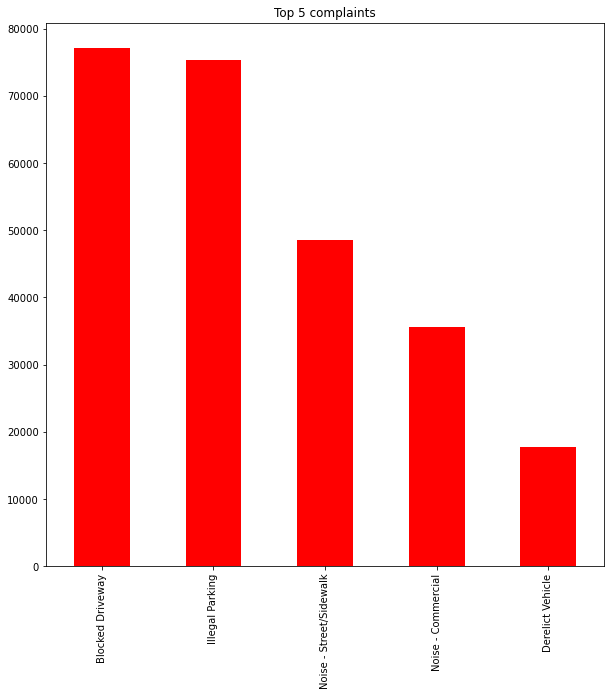

In [533]:
top_5.plot(kind='bar',figsize=(10,10), color='r', title='Top 5 complaints')
plt.show()

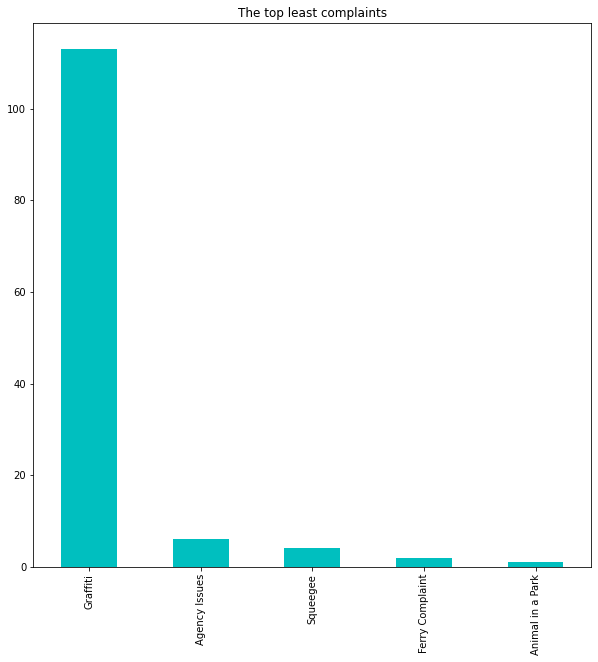

In [534]:
#plot the least complaints
button_5 = df_complaint.tail()
button_5

button_5.plot(kind='bar', figsize=(10,10), title='The top least complaints', color='c')
plt.show()

In [539]:
#complaints distribution accross boroughs
#df_boroughs= pd.DataFrame(raw_data[['Complaint Type','Borough']].groupby(by=['Borough']).count())
#df_boroughs = df_boroughs.sort_values(by=['Unique Key'],ascending=False)
df_boroughs = raw_data['Borough'].value_counts()
df_boroughs


BROOKLYN         98307
QUEENS           80641
MANHATTAN        66131
BRONX            40702
STATEN ISLAND    12343
Unspecified       2574
Name: Borough, dtype: int64

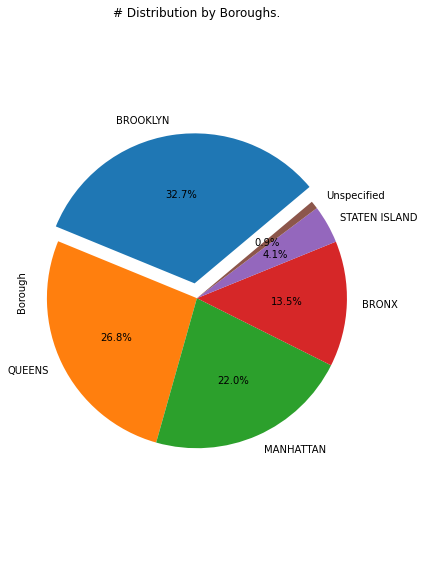

In [591]:
#plot the distribution
df_boroughs.plot(kind='pie',figsize=(6,8),subplots=True, startangle=40,shadow=False, autopct='%1.1f%%', explode=(0.10,0,0,0,0,0))
plt.axis('equal')
plt.title('# Distribution by Boroughs.')
plt.tight_layout()
plt.show()

In [540]:
#### Let's analyse the different type of complaints in BROOKLYN 
df_brooklyn = raw_data[raw_data['Borough']== 'BROOKLYN']
df_brooklyn

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
Unique Key,,,,,,,,,,,,,,,,,,,,,
32306554,2015-12-31 23:56:30,2016-01-01 01:50:00,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11215.0,260 21 STREET,21 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.660823,-73.992568,"(40.66082272389114, -73.99256786342693)",0 days 01:53:30
32308391,2015-12-31 23:53:58,2016-01-01 01:17:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11219.0,1408 66 STREET,66 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.623793,-73.999539,"(40.623793065806524, -73.99953890121567)",0 days 01:23:02
32305074,2015-12-31 23:47:58,2016-01-01 08:18:00,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11208.0,38 COX PLACE,COX PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.687511,-73.874505,"(40.68751060232221, -73.87450451131276)",0 days 08:30:02
32310273,2015-12-31 23:44:52,2016-01-01 00:36:00,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11217.0,622 DEGRAW STREET,DEGRAW STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.679154,-73.983430,"(40.679154133157326, -73.98342992763081)",0 days 00:51:08
32306617,2015-12-31 23:40:59,2016-01-01 02:37:00,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11234.0,2192 FLATBUSH AVENUE,FLATBUSH AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.616550,-73.930202,"(40.61655032892211, -73.93020153359745)",0 days 02:56:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30283933,2015-03-29 00:48:23,2015-03-29 03:42:33,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11238.0,799 DEAN STREET,DEAN STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.679237,-73.963355,"(40.679237323783724, -73.96335543308066)",0 days 02:54:10
30283186,2015-03-29 00:46:26,2015-03-29 07:12:20,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11249.0,98A SOUTH 4 STREET,SOUTH 4 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.712285,-73.964001,"(40.712284534374824, -73.96400097454304)",0 days 06:25:54
30284534,2015-03-29 00:44:36,2015-03-29 03:40:20,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11238.0,801 DEAN STREET,DEAN STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.679226,-73.963309,"(40.67922632975442, -73.96330856984594)",0 days 02:55:44


In [542]:
#get the most complaints in brooklyn
#brooklyn_most_complaint = pd.DataFrame(df_brooklyn.groupby(by='Complaint Type').count())
#brooklyn_most_complaint = brooklyn_most_complaint.sort_values(by='Unique Key',ascending=False)
brooklyn_most_complaint = df_brooklyn['Complaint Type'].value_counts()
brooklyn_most_complaint.head()



Blocked Driveway           28148
Illegal Parking            27462
Noise - Street/Sidewalk    13355
Noise - Commercial         11463
Derelict Vehicle            5181
Name: Complaint Type, dtype: int64

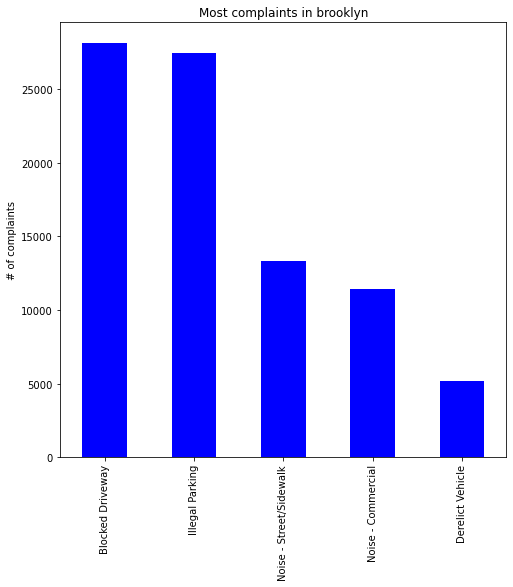

In [543]:
#plot the most complaints in Broooklyn (top 5)

brooklyn_most_complaint.head().plot(kind='bar', figsize=(8,8), color='b')
plt.title('Most complaints in brooklyn')
plt.ylabel('# of complaints')
plt.show()

In [544]:
# The most complaint in Brooklyn is Blocked Driveway
df_brooklyn_Blocked = df_brooklyn[df_brooklyn['Complaint Type']== 'Blocked Driveway']
df_brooklyn_Blocked

#get the the blocked driveeay complaint description
df_brooklyn_Blocked.Descriptor.value_counts()

No Access         21422
Partial Access     6726
Name: Descriptor, dtype: int64

### 4.Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.

In [545]:
complaints_data = raw_data.sort_values(by='Request_Closing_Time', ascending= True)
complaints_data

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
Unique Key,,,,,,,,,,,,,,,,,,,,,
31882332,2015-11-01 01:41:00,2015-11-01 01:42:00,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10003.0,78 EAST 4 STREET,EAST 4 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.726422,-73.990003,"(40.726422494913116, -73.9900025591503)",0 days 00:01:00
31212389,2015-08-01 14:33:00,2015-08-01 14:35:00,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,11206.0,88 MOORE STREET,MOORE STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.703813,-73.941951,"(40.703813419626954, -73.94195083019125)",0 days 00:02:00
30823148,2015-06-11 20:39:00,2015-06-11 20:41:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10310.0,169 MYRTLE AVENUE,MYRTLE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.629775,-74.117267,"(40.62977454750427, -74.11726652408944)",0 days 00:02:00
31890750,2015-11-01 20:16:00,2015-11-01 20:18:00,NYPD,New York City Police Department,Posting Advertisement,Vehicle,Street/Sidewalk,10312.0,177 LAREDO AVENUE,LAREDO AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.549094,-74.173633,"(40.549093797686275, -74.17363282481907)",0 days 00:02:00
30581172,2015-05-10 01:33:00,2015-05-10 01:35:00,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,10003.0,100 3 AVENUE,3 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.732400,-73.987844,"(40.73240036503256, -73.9878439553108)",0 days 00:02:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30287350,2015-03-29 14:40:19,NaT,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,NaN,3801-3999 23RD AVE,23RD AVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
30284963,2015-03-29 08:50:15,NaT,NYPD,New York City Police Department,Vending,Unlicensed,Street/Sidewalk,NaN,COOPER AVE,COOPER AVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
30285492,2015-03-29 08:44:13,NaT,NYPD,New York City Police Department,Vending,Unlicensed,Street/Sidewalk,NaN,80 STREET,80 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [546]:
#group by location

complaints_by_location = pd.DataFrame(complaints_data.groupby(by='Location Type').agg({'Request_Closing_Time':['sum']}))
                                     
complaints_by_location

,Request_Closing_Time
,sum
Location Type,
Bridge,0 days 07:38:19
Club/Bar/Restaurant,2226 days 01:02:29
Commercial,13 days 19:15:06
Ferry,0 days 00:00:00
Highway,33 days 04:52:47
House and Store,19 days 10:14:00
House of Worship,123 days 11:49:27
Park,14 days 00:50:05


In [547]:
#create a new column containt the total seconds of the time of resolution

raw_data['Total_seconds'] = raw_data['Request_Closing_Time'].dt.days*86400 + raw_data['Request_Closing_Time'].dt.components.hours*3600 +raw_data['Request_Closing_Time'].dt.components.minutes*60 + raw_data['Request_Closing_Time'].dt.components.seconds
raw_data

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time,Total_seconds
Unique Key,,,,,,,,,,,,,,,,,,,,,
32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:15,3315.0
32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:26:16,5176.0
32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:31,17491.0
32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:45:14,27914.0
32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,...,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:27:02,12422.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30281872,2015-03-29 00:33:41,NaT,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
30281230,2015-03-29 00:33:28,2015-03-29 02:33:59,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,87 AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)",0 days 02:00:31,7231.0
30283424,2015-03-29 00:33:03,2015-03-29 03:40:20,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,THROOP AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)",0 days 03:07:17,11237.0


In [548]:
#average resolve by city by complaint type
df_avg_time_by_city = pd.DataFrame(raw_data.groupby(['City','Complaint Type']).Total_seconds.mean())
df_avg_time_by_city

Total_seconds
City     Complaint Type                        
ARVERNE  Animal Abuse               7753.052632
         Blocked Driveway           9093.485714
         Derelict Vehicle          10685.592593
         Disorderly Youth          12928.500000
         Drinking                    859.000000
...                                         ...
Woodside Blocked Driveway          23062.363636
         Derelict Vehicle          17880.000000
         Illegal Parking           18789.130000
         Noise - Commercial         8619.000000
         Noise - Street/Sidewalk   12280.600000

[764 rows x 1 columns]

In [549]:
#get the average response by complaint type

average_by_type = pd.DataFrame(raw_data.groupby('Complaint Type').Total_seconds.mean().sort_values(ascending=True))
average_by_type.style.format("{:.8}")

,Total_seconds
Complaint Type,
Posting Advertisement,7112.892
Illegal Fireworks,9940.1012
Noise - Commercial,11329.756
Noise - House of Worship,11495.874
Noise - Park,12278.637
Noise - Street/Sidewalk,12402.807
Traffic,12415.252
Disorderly Youth,12810.902
Noise - Vehicle,12920.376


### 5.Perform a statistical test
##### Please note: For the below statements you need to state the Null and Alternate and then provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’.

##### Whether the average response time across complaint types is similar or not (overall)
##### Are the type of complaint or service requested and location related?

### Statistical test Resolution
#### The Null hypothesis is the resolution time across Complaints type are equal.
#### The alternative hypothesis is the resolution time across Complaints type are not equal.

In [557]:
#first let's analyse and performe one way Anova on the time across 'Noise - Street/Sidewalk' and 'Traffic'

df_noise_street = raw_data[raw_data['Complaint Type']=='Noise - Street/Sidewalk']
df_noise_street

df_trafic = raw_data[raw_data['Complaint Type']=='Traffic']
df_trafic

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time,Total_seconds
Unique Key,,,,,,,,,,,,,,,,,,,,,
32305102,2015-12-31 21:41:42,2016-01-01 02:09:00,NYPD,New York City Police Department,Traffic,Congestion/Gridlock,Street/Sidewalk,11207.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,40.651150,-73.890004,"(40.65114990776361, -73.89000444066276)",0 days 04:27:18,16038.0
32308647,2015-12-31 16:50:18,2015-12-31 19:14:31,NYPD,New York City Police Department,Traffic,Congestion/Gridlock,Street/Sidewalk,11354.0,40-24 COLLEGE POINT BOULEVARD,COLLEGE POINT BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,40.757451,-73.834054,"(40.75745083502987, -73.83405387160332)",0 days 02:24:13,8653.0
32306478,2015-12-31 16:13:48,2015-12-31 16:52:00,NYPD,New York City Police Department,Traffic,Truck Route Violation,Street/Sidewalk,11238.0,436 CLASSON AVENUE,CLASSON AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.685049,-73.959256,"(40.68504937399992, -73.95925622782188)",0 days 00:38:12,2292.0
32308639,2015-12-31 16:09:28,2015-12-31 16:52:00,NYPD,New York City Police Department,Traffic,Truck Route Violation,Street/Sidewalk,11238.0,436 CLASSON AVENUE,CLASSON AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.685049,-73.959256,"(40.68504937399992, -73.95925622782188)",0 days 00:42:32,2552.0
32305876,2015-12-31 16:09:25,2015-12-31 18:37:24,NYPD,New York City Police Department,Traffic,Congestion/Gridlock,Street/Sidewalk,11230.0,1470 OCEAN PARKWAY,OCEAN PARKWAY,...,NaN,NaN,NaN,NaN,NaN,40.612977,-73.968362,"(40.61297697591644, -73.96836222220286)",0 days 02:27:59,8879.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30285416,2015-03-29 14:11:25,2015-03-29 14:49:57,NYPD,New York City Police Department,Traffic,Chronic Speeding,Street/Sidewalk,10069.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,40.778183,-73.988572,"(40.77818279512198, -73.98857217760506)",0 days 00:38:32,2312.0
30289276,2015-03-29 13:56:59,2015-03-29 15:02:30,NYPD,New York City Police Department,Traffic,Congestion/Gridlock,Street/Sidewalk,11216.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,40.670008,-73.953271,"(40.67000847994608, -73.95327058228109)",0 days 01:05:31,3931.0
30289129,2015-03-29 12:45:40,2015-03-29 13:26:33,NYPD,New York City Police Department,Traffic,Congestion/Gridlock,Street/Sidewalk,11230.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,40.627156,-73.965625,"(40.62715578543678, -73.96562479378889)",0 days 00:40:53,2453.0


In [558]:
df_noise_street = df_noise_street.loc[:,['Total_seconds']]
df_noise_street

,Total_seconds
Unique Key,
32310363,3315.0
32306612,8937.0
32308195,2825.0
32308014,1768.0
32308825,5384.0
...,...
30283364,8440.0
30280353,3690.0
30283933,10450.0


In [561]:
df_trafic = df_trafic.loc[:,['Total_seconds']]
df_trafic

,Total_seconds
Unique Key,
32305102,16038.0
32308647,8653.0
32306478,2292.0
32308639,2552.0
32305876,8879.0
...,...
30285416,2312.0
30289276,3931.0
30289129,2453.0


In [589]:
from scipy.stats import f_oneway
fvalue, pvalue = f_oneway(df_noise_street.dropna(), df_trafic.dropna())
pvalue

array([0.96720038])

### Here the p-value is near to 1 so we can accept the Null Hypothesis.

In [580]:
df_adv = raw_data[raw_data['Complaint Type'] == 'Posting Advertisement']
df_adv

df_adv = df_adv.loc[:,['Total_seconds']]
df_adv.head()

,Total_seconds
Unique Key,
32306752,7596.0
32307464,7745.0
32308949,7834.0
32307323,8042.0
32306034,8137.0


In [584]:
df_derelict = raw_data[raw_data['Complaint Type']=='Derelict Vehicle']
df_derelict

df_derelict = df_derelict.loc[:,['Total_seconds']]
df_derelict.head()
#df_derelict.Total_seconds

,Total_seconds
Unique Key,
32309424,37763.0
32306497,14221.0
32305124,4913.0
32308002,14879.0
32305798,2712.0


In [590]:
fvalue, pvalue = stats.f_oneway(df_adv.dropna(), df_derelict.dropna())
pvalue

array([6.18500103e-35])

### here the we can reject the Null hypothesis since the p-value is < 0.05